# Table of Contents

1. Import libraries and set up environment
2. Data Clean
3. Data Prep
4. Elbow Technique
5. Clustering
6. Analysis

## 1. Set Up Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# setting pandas options
pd.set_option('display.max_columns',None)
# checking matplotlib version
matplotlib.__version__
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# setting master path
path = r'/Users/Norberto/Desktop/2024 World University Rankings Analysis'

# reading data file
rankings = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'rankings_merged.csv'))

## 2. Data Clean

- The NaN values that were present in my data previously are now causing problems with clustering and the unsupervised machine learning algorithms. I therefore, will explore the different ways I can address those values in this section below

In [3]:
# take a look at the df stats
rankings.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,1.243200e+04,12432.000000,12432.000000,11841.000000,11841.000000,7979.000000
mean,666.618054,667.718159,30.058349,667.718300,48.330235,667.718300,46.190783,667.718300,26.040077,667.718300,51.217724,667.718300,2019.722023,2.336508e+04,18.897708,11.303652,50.117051,49.882949,4.786060
std,476.461303,475.628711,15.151232,475.628663,22.892412,475.628663,19.792330,475.628663,18.773767,475.628663,27.186978,475.628663,3.425403,3.498470e+04,17.056597,11.823633,12.354613,12.354613,1.087987
min,1.000000,1.000000,8.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2011.000000,2.500000e+01,0.300000,0.000000,0.000000,0.000000,1.199786
25%,251.000000,259.000000,19.300000,259.000000,29.000000,259.000000,35.100000,259.000000,12.300000,259.000000,27.200000,259.000000,2017.000000,1.014775e+04,12.300000,2.000000,44.000000,42.000000,4.056020
50%,591.000000,591.000000,25.500000,591.000000,44.400000,591.000000,39.500000,591.000000,19.800000,591.000000,51.200000,591.000000,2020.000000,1.782150e+04,16.300000,7.000000,53.000000,47.000000,4.928890
75%,1014.000000,1014.000000,36.100000,1014.000000,64.650000,1014.000000,52.700000,1014.000000,33.500000,1014.000000,74.300000,1014.000000,2023.000000,2.921550e+04,22.000000,17.000000,58.000000,56.000000,5.435440
max,1906.000000,1906.000000,99.700000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,2024.000000,1.824383e+06,865.800000,92.000000,100.000000,100.000000,11.524796


In [4]:
# check for null values
rankings.isnull().sum()

rank_order                       0
rank                             0
name                             0
scores_overall_rank              0
scores_teaching                  0
scores_teaching_rank             0
scores_intl_outlk                0
scores_intl_outlk_rank           0
scores_industry_incme            0
scores_industry_incme_rank       0
scores_research                  0
scores_research_rank             0
scores_citations                 0
scores_citations_rank            0
location                         0
subjects_offered                 0
unaccredited                     0
year                             0
stats_number_students         1803
stats_student_staff_ratio     1803
stats_pc_intl_students        1803
stats_female_pct              2394
stats_male_pct                2394
gdp%                          6256
dtype: int64

#### Not Imputed Data

In [5]:
# Create first version by just removing all NaN values
r_notimputed = rankings[rankings['stats_number_students'].notnull()]
r_notimputed = r_notimputed[r_notimputed['stats_female_pct'].notnull()]
r_notimputed = r_notimputed[r_notimputed['gdp%'].notnull()]

In [6]:
# check to make sure all NaN values removed
r_notimputed.isnull().sum()

rank_order                    0
rank                          0
name                          0
scores_overall_rank           0
scores_teaching               0
scores_teaching_rank          0
scores_intl_outlk             0
scores_intl_outlk_rank        0
scores_industry_incme         0
scores_industry_incme_rank    0
scores_research               0
scores_research_rank          0
scores_citations              0
scores_citations_rank         0
location                      0
subjects_offered              0
unaccredited                  0
year                          0
stats_number_students         0
stats_student_staff_ratio     0
stats_pc_intl_students        0
stats_female_pct              0
stats_male_pct                0
gdp%                          0
dtype: int64

In [7]:
# look at df stats and compare changes to rankings
r_notimputed.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5.933000e+03,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000
mean,600.455587,600.455587,28.989735,612.208495,48.897758,585.758807,45.469054,616.912860,24.964638,605.944547,50.262582,594.547278,2018.807517,2.384595e+04,19.648003,12.284173,49.847632,50.152368,4.628778
std,379.188499,379.188499,14.175810,378.959190,23.506154,375.518646,17.415604,376.335257,18.051211,376.105991,27.770590,376.145028,1.687594,4.220732e+04,22.190271,11.686257,12.178642,12.178642,1.049653
min,1.000000,1.000000,8.200000,1.000000,7.100000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2016.000000,4.620000e+02,0.600000,0.000000,0.000000,0.000000,1.199786
25%,284.000000,284.000000,19.100000,294.000000,28.800000,272.000000,34.900000,304.000000,11.900000,292.000000,25.300000,281.000000,2017.000000,1.098500e+04,12.400000,3.000000,44.000000,42.000000,3.806160
50%,567.000000,567.000000,24.600000,585.000000,45.600000,545.000000,38.800000,593.000000,19.100000,580.000000,48.900000,558.000000,2019.000000,1.868100e+04,16.600000,9.000000,52.000000,48.000000,4.806660
75%,877.000000,877.000000,34.400000,891.000000,65.500000,860.000000,49.700000,892.000000,31.600000,884.000000,74.200000,873.000000,2020.000000,2.970000e+04,22.500000,18.000000,58.000000,56.000000,5.327368
max,1655.000000,1655.000000,95.600000,1662.000000,100.000000,1540.000000,100.000000,1659.000000,99.600000,1659.000000,100.000000,1653.000000,2022.000000,1.824383e+06,865.800000,84.000000,100.000000,100.000000,11.524796


- This df lost almost 10,000 observations and the stats changed drastically from original df

#### Imputed Data

In [8]:
# create a copy of original df
r_imputed = rankings.copy()

# group data by school
df = rankings.groupby(['name']).mean(['stats_number_students'])

# group data by location
df2 = rankings.groupby(['location']).mean(['gdp%'])

In [9]:
# check df for the average number of students at BU
df['stats_number_students']['Boston University']

25923.11111111111

In [10]:
# check original rankings values for comparison to df
rankings.loc[rankings['name']=='Boston University'][['name','rank_order','stats_number_students',
                                                       'stats_pc_intl_students','stats_student_staff_ratio',
                                                       'stats_female_pct','stats_male_pct','gdp%']]

,name,rank_order,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,stats_female_pct,stats_male_pct,gdp%
33,Boston University,59,NaN,NaN,NaN,NaN,NaN,6.497684
231,Boston University,54,NaN,NaN,NaN,NaN,NaN,6.253886
633,Boston University,54,NaN,NaN,NaN,NaN,NaN,6.229258
1031,Boston University,50,NaN,NaN,NaN,NaN,NaN,6.129206
1432,Boston University,57,NaN,NaN,NaN,NaN,NaN,4.946780
1832,Boston University,64,24789.0,17.0,8.6,58.0,42.0,4.806660
2725,Boston University,64,24714.0,19.0,8.4,59.0,41.0,5.122880
3710,Boston University,70,24833.0,25.0,8.6,60.0,40.0,4.928890
4818,Boston University,74,25095.0,27.0,8.4,60.0,40.0,4.987280
6074,Boston University,61,25662.0,27.0,11.6,60.0,40.0,5.435440


In [11]:
# check original rankings values for comparison df2
rankings.loc[rankings['location']=='Japan'][['name','rank_order','year','gdp%']]

,name,rank_order,year,gdp%
120,The University of Tokyo,26,2011,3.60528
121,Kyoto University,57,2011,3.60528
122,Tokyo Institute of Technology,112,2011,3.60528
123,Osaka University,130,2011,3.60528
124,Tohoku University,132,2011,3.60528
...,...,...,...,...
12849,Tokyo Denki University,1878,2024,NaN
12850,Tottori University,1880,2024,NaN
12851,Toyama Prefectural University,1881,2024,NaN
12852,Toyo University,1882,2024,NaN


In [12]:
# go through each school in df, check for null values in new data set, and replace with average
for row in df.iterrows():
    for col in ['stats_number_students','stats_pc_intl_students','stats_student_staff_ratio',
                'stats_female_pct','stats_male_pct']:
        r_imputed.loc[(r_imputed['name']==row[0]) & (r_imputed[col].isnull()),col] = df[col][row[0]]

# go through each country in df2, check for null values in new data set, and replace with average
for country in r_imputed['location'].unique():
    r_imputed.loc[(r_imputed['location']==country) & (r_imputed['gdp%'].isnull()),'gdp%'] = df2['gdp%'][country]

In [13]:
# check example to compare if values were imputed correctly
r_imputed.loc[r_imputed['name']=='Boston University'][['name','rank_order','stats_number_students',
                                                       'stats_pc_intl_students','stats_student_staff_ratio',
                                                       'stats_female_pct','stats_male_pct','gdp%']]

,name,rank_order,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,stats_female_pct,stats_male_pct,gdp%
33,Boston University,59,25923.111111,25.777778,9.922222,59.111111,40.888889,6.497684
231,Boston University,54,25923.111111,25.777778,9.922222,59.111111,40.888889,6.253886
633,Boston University,54,25923.111111,25.777778,9.922222,59.111111,40.888889,6.229258
1031,Boston University,50,25923.111111,25.777778,9.922222,59.111111,40.888889,6.129206
1432,Boston University,57,25923.111111,25.777778,9.922222,59.111111,40.888889,4.946780
1832,Boston University,64,24789.000000,17.000000,8.600000,58.000000,42.000000,4.806660
2725,Boston University,64,24714.000000,19.000000,8.400000,59.000000,41.000000,5.122880
3710,Boston University,70,24833.000000,25.000000,8.600000,60.000000,40.000000,4.928890
4818,Boston University,74,25095.000000,27.000000,8.400000,60.000000,40.000000,4.987280
6074,Boston University,61,25662.000000,27.000000,11.600000,60.000000,40.000000,5.435440


In [14]:
# check example to compare if values were imputed correctly
r_imputed.loc[rankings['location']=='Japan'][['name','rank_order','year','gdp%']]

,name,rank_order,year,gdp%
120,The University of Tokyo,26,2011,3.605280
121,Kyoto University,57,2011,3.605280
122,Tokyo Institute of Technology,112,2011,3.605280
123,Osaka University,130,2011,3.605280
124,Tohoku University,132,2011,3.605280
...,...,...,...,...
12849,Tokyo Denki University,1878,2024,3.258033
12850,Tottori University,1880,2024,3.258033
12851,Toyama Prefectural University,1881,2024,3.258033
12852,Toyo University,1882,2024,3.258033


In [15]:
# Check missing values in new imputed data set
r_imputed.isnull().sum()

rank_order                      0
rank                            0
name                            0
scores_overall_rank             0
scores_teaching                 0
scores_teaching_rank            0
scores_intl_outlk               0
scores_intl_outlk_rank          0
scores_industry_incme           0
scores_industry_incme_rank      0
scores_research                 0
scores_research_rank            0
scores_citations                0
scores_citations_rank           0
location                        0
subjects_offered                0
unaccredited                    0
year                            0
stats_number_students          10
stats_student_staff_ratio      10
stats_pc_intl_students         10
stats_female_pct              372
stats_male_pct                372
gdp%                          647
dtype: int64

In [16]:
# look at stats before removing NaN values
r_imputed.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,14235.000000,1.422500e+04,14225.000000,14225.000000,13863.000000,13863.000000,13588.000000
mean,666.618054,667.718159,30.058349,667.718300,48.330235,667.718300,46.190783,667.718300,26.040077,667.718300,51.217724,667.718300,2019.722023,2.345524e+04,18.788231,12.264583,50.130658,49.869342,4.684053
std,476.461303,475.628711,15.151232,475.628663,22.892412,475.628663,19.792330,475.628663,18.773767,475.628663,27.186978,475.628663,3.425403,3.312847e+04,16.330409,12.043498,12.056042,12.056042,1.077011
min,1.000000,1.000000,8.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2011.000000,2.500000e+01,0.300000,0.000000,0.000000,0.000000,1.199786
25%,251.000000,259.000000,19.300000,259.000000,29.000000,259.000000,35.100000,259.000000,12.300000,259.000000,27.200000,259.000000,2017.000000,1.046200e+04,12.300000,3.000000,44.000000,42.000000,3.929090
50%,591.000000,591.000000,25.500000,591.000000,44.400000,591.000000,39.500000,591.000000,19.800000,591.000000,51.200000,591.000000,2020.000000,1.829900e+04,16.288889,9.000000,53.000000,47.000000,4.806660
75%,1014.000000,1014.000000,36.100000,1014.000000,64.650000,1014.000000,52.700000,1014.000000,33.500000,1014.000000,74.300000,1014.000000,2023.000000,2.946700e+04,21.900000,18.000000,58.000000,56.000000,5.423693
max,1906.000000,1906.000000,99.700000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,2024.000000,1.824383e+06,865.800000,92.000000,100.000000,100.000000,11.524796


In [17]:
# removing all remaining NaN values
r_imputed = r_imputed[r_imputed['stats_number_students'].notnull()]
r_imputed = r_imputed[r_imputed['stats_female_pct'].notnull()]
r_imputed = r_imputed[r_imputed['gdp%'].notnull()]

In [18]:
# check stats after removing NaN and compare
r_imputed.describe()

,rank_order,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_intl_outlk,scores_intl_outlk_rank,scores_industry_incme,scores_industry_incme_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
count,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000,1.321600e+04,13216.000000,13216.000000,13216.000000,13216.000000,13216.000000
mean,659.866677,661.013620,30.156696,660.177209,48.690080,662.035487,45.696928,673.824909,26.029986,665.540103,51.782408,658.951044,2019.699455,2.365078e+04,18.951625,12.489022,50.177496,49.822504,4.692455
std,475.166816,474.317903,15.080185,471.685042,22.960505,477.638182,19.386912,471.243442,18.795530,472.420904,27.185892,474.917938,3.423940,3.418774e+04,16.780102,12.110863,11.971077,11.971077,1.076416
min,1.000000,1.000000,8.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.800000,1.000000,0.700000,1.000000,2011.000000,2.500000e+01,0.300000,0.000000,0.000000,0.000000,1.199786
25%,251.000000,254.000000,19.400000,255.000000,29.300000,251.000000,35.000000,270.000000,12.300000,261.000000,28.000000,253.000000,2017.000000,1.049075e+04,12.366667,3.000000,44.777778,42.000000,3.929090
50%,581.000000,581.000000,25.700000,581.000000,45.000000,577.000000,39.300000,604.000000,19.700000,590.500000,52.100000,574.000000,2020.000000,1.826150e+04,16.300000,9.000000,53.000000,47.000000,4.806660
75%,1004.000000,1004.000000,36.400000,1002.000000,65.000000,1009.250000,51.700000,1015.000000,33.400000,1010.000000,74.800000,1001.000000,2023.000000,2.958875e+04,22.100000,18.111111,58.000000,55.222222,5.423693
max,1906.000000,1906.000000,99.700000,1905.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,100.000000,1906.000000,2024.000000,1.824383e+06,865.800000,92.000000,100.000000,100.000000,11.524796


- The difference between the removed NaN values and the imputed average table is very small, with only about 1,000 records being lost. This is 10 times less observation loss than just removing the values before averaging.

In [19]:
r_imputed.isnull().sum()

rank_order                    0
rank                          0
name                          0
scores_overall_rank           0
scores_teaching               0
scores_teaching_rank          0
scores_intl_outlk             0
scores_intl_outlk_rank        0
scores_industry_incme         0
scores_industry_incme_rank    0
scores_research               0
scores_research_rank          0
scores_citations              0
scores_citations_rank         0
location                      0
subjects_offered              0
unaccredited                  0
year                          0
stats_number_students         0
stats_student_staff_ratio     0
stats_pc_intl_students        0
stats_female_pct              0
stats_male_pct                0
gdp%                          0
dtype: int64

## 3. Data Prep

In [48]:
rankings_q = r_imputed[['scores_teaching','scores_intl_outlk',
                     'scores_industry_incme','scores_research',
                     'scores_citations','stats_number_students',
                      'stats_student_staff_ratio','stats_pc_intl_students',
                      'stats_female_pct','stats_male_pct','gdp%']]

In [49]:
rankings_q

,scores_teaching,scores_intl_outlk,scores_industry_incme,scores_research,scores_citations,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
0,99.7,72.4,34.5,98.7,98.8,20728.666667,9.144444,25.000000,49.500000,50.500000,6.497684
1,97.7,54.6,83.7,98.0,99.9,2230.666667,6.433333,30.333333,34.222222,65.777778,6.497684
2,97.8,82.3,87.5,91.4,99.9,11239.555556,8.533333,33.444444,38.666667,61.333333,6.497684
3,98.3,29.5,64.3,98.1,99.2,15815.000000,7.322222,22.777778,43.888889,56.111111,6.497684
4,90.9,70.3,0.0,95.4,99.9,7962.666667,8.022222,23.888889,45.666667,54.333333,6.497684
...,...,...,...,...,...,...,...,...,...,...,...
14225,20.1,35.5,19.7,8.6,13.8,23684.000000,13.200000,2.000000,66.000000,34.000000,2.904259
14226,28.1,53.0,33.9,11.8,10.8,15584.000000,9.000000,5.000000,64.000000,36.000000,11.524796
14228,12.0,29.2,24.1,9.4,16.9,50145.000000,35.200000,0.000000,63.000000,37.000000,4.967157
14229,18.0,37.1,19.4,10.3,20.0,174780.000000,16.900000,1.000000,65.000000,35.000000,4.967157


In [50]:
rankings_q['stats_number_students'] = (rankings_q['stats_number_students'] - rankings_q['stats_number_students'].mean()) / rankings_q['stats_number_students'].std()

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_47766/3268055964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings_q['stats_number_students'] = (rankings_q['stats_number_students'] - rankings_q['stats_number_students'].mean()) / rankings_q['stats_number_students'].std()


In [51]:
rankings_q

,scores_teaching,scores_intl_outlk,scores_industry_incme,scores_research,scores_citations,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%
0,99.7,72.4,34.5,98.7,98.8,-0.085473,9.144444,25.000000,49.500000,50.500000,6.497684
1,97.7,54.6,83.7,98.0,99.9,-0.626544,6.433333,30.333333,34.222222,65.777778,6.497684
2,97.8,82.3,87.5,91.4,99.9,-0.363031,8.533333,33.444444,38.666667,61.333333,6.497684
3,98.3,29.5,64.3,98.1,99.2,-0.229199,7.322222,22.777778,43.888889,56.111111,6.497684
4,90.9,70.3,0.0,95.4,99.9,-0.458881,8.022222,23.888889,45.666667,54.333333,6.497684
...,...,...,...,...,...,...,...,...,...,...,...
14225,20.1,35.5,19.7,8.6,13.8,0.000972,13.200000,2.000000,66.000000,34.000000,2.904259
14226,28.1,53.0,33.9,11.8,10.8,-0.235955,9.000000,5.000000,64.000000,36.000000,11.524796
14228,12.0,29.2,24.1,9.4,16.9,0.774963,35.200000,0.000000,63.000000,37.000000,4.967157
14229,18.0,37.1,19.4,10.3,20.0,4.420567,16.900000,1.000000,65.000000,35.000000,4.967157


## 4. Elbow Technique

In [52]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [53]:
score = [kmeans[i].fit(rankings_q).score(rankings_q) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-38849598.12312588,
 -26032564.112379014,
 -22009194.436911844,
 -19801909.700332537,
 -18064054.775767464,
 -16706028.11334784,
 -15911239.49125028,
 -15078112.606628172,
 -14364911.223628227]

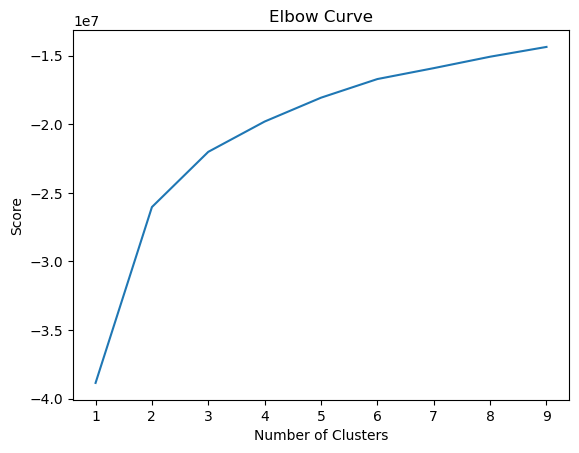

In [54]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 5. Clustering

In [55]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [56]:
# Fit the k-means object to the data.

kmeans.fit(rankings_q)

KMeans(n_clusters=3)

In [57]:
rankings_q['clusters'] = kmeans.fit_predict(rankings_q)

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_47766/3501633959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings_q['clusters'] = kmeans.fit_predict(rankings_q)


In [58]:
rankings_q.head()

,scores_teaching,scores_intl_outlk,scores_industry_incme,scores_research,scores_citations,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_pct,stats_male_pct,gdp%,clusters
0,99.7,72.4,34.5,98.7,98.8,-0.085473,9.144444,25.000000,49.500000,50.500000,6.497684,2
1,97.7,54.6,83.7,98.0,99.9,-0.626544,6.433333,30.333333,34.222222,65.777778,6.497684,2
2,97.8,82.3,87.5,91.4,99.9,-0.363031,8.533333,33.444444,38.666667,61.333333,6.497684,2
3,98.3,29.5,64.3,98.1,99.2,-0.229199,7.322222,22.777778,43.888889,56.111111,6.497684,2
4,90.9,70.3,0.0,95.4,99.9,-0.458881,8.022222,23.888889,45.666667,54.333333,6.497684,2


In [59]:
rankings_q['clusters'].value_counts()

clusters
0    5473
1    5228
2    2515
Name: count, dtype: int64

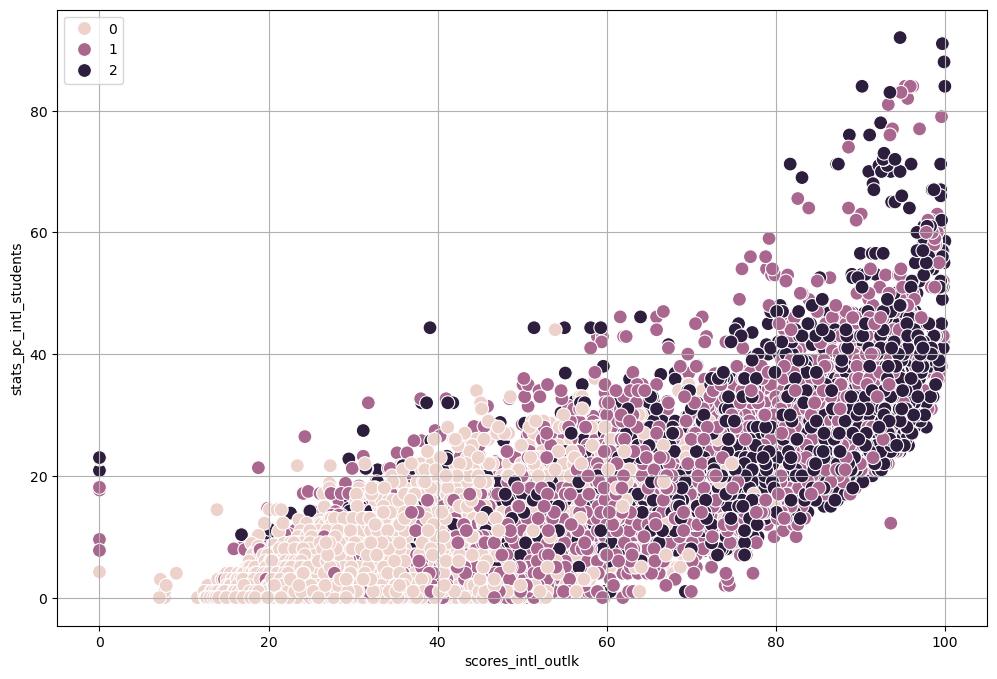

In [60]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rankings_q['scores_intl_outlk'], y=rankings_q['stats_pc_intl_students'], hue=kmeans.labels_, s=100) 


ax.grid(True)
plt.xlabel('scores_intl_outlk') # Label x-axis.
plt.ylabel('stats_pc_intl_students') # Label y-axis.
plt.show()

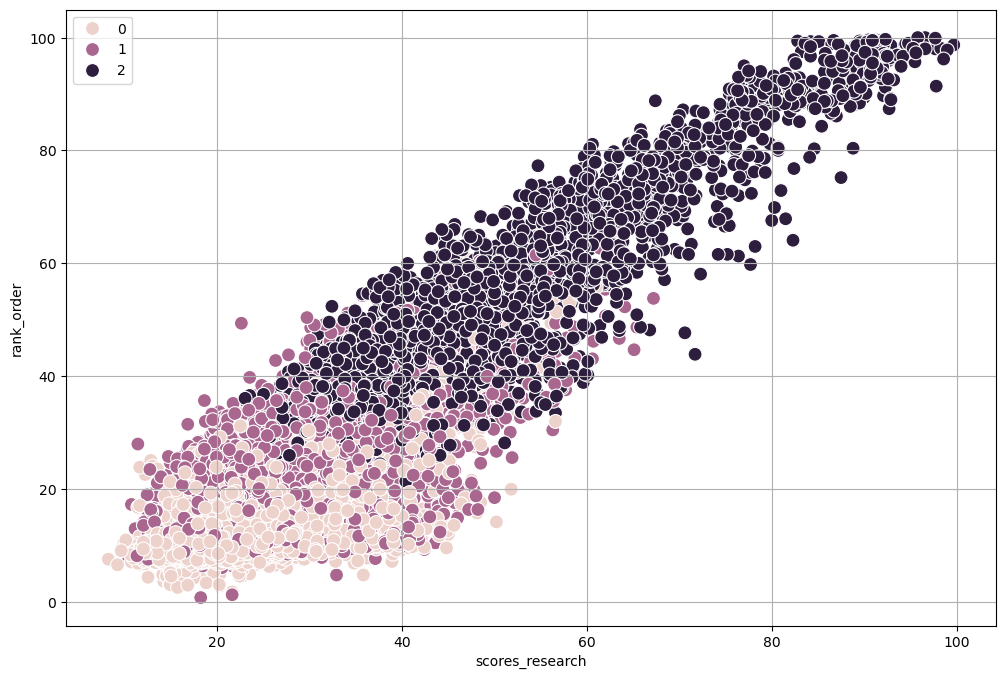

In [61]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rankings_q['scores_teaching'], y=rankings_q['scores_research'], hue=kmeans.labels_, s=100)

ax.grid(True) 
plt.xlabel('scores_research') 
plt.ylabel('rank_order') 
plt.show()

In [62]:
rankings_q.loc[rankings_q['clusters'] == 2, 'cluster'] = 'dark purple'
rankings_q.loc[rankings_q['clusters'] == 1, 'cluster'] = 'purple'
rankings_q.loc[rankings_q['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/3m/mnr2tt816zdf9g05m8qn00p40000gn/T/ipykernel_47766/3904196407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings_q.loc[rankings_q['clusters'] == 2, 'cluster'] = 'dark purple'


In [63]:
rankings_q.groupby('cluster').agg({'stats_pc_intl_students':['mean', 'median','min','max'], 
                         'scores_intl_outlk':['mean', 'median','min','max'], 
                         'scores_teaching':['mean', 'median','min','max'],
                         'scores_research':['mean', 'median','min','max']})

stats_pc_intl_students                   scores_intl_outlk         \
                              mean median  min   max              mean median   
cluster                                                                         
dark purple              23.784946   21.0  0.0  92.0         70.419881   71.8   
pink                      5.108372    3.0  0.0  44.0         31.131263   28.4   
purple                   14.781496   12.0  0.0  84.0         56.618344   54.4   

                        scores_teaching                    scores_research  \
             min    max            mean median   min   max            mean   
cluster                                                                      
dark purple  0.0  100.0       52.053598   48.2  21.1  99.7       55.767197   
pink         0.0   84.5       22.639430   20.8   8.2  63.0       14.604970   
purple       0.0   99.9       27.492445   26.0   9.9  67.2       23.684927   

                                 
            median   min    max  
cluster                          
dark purple   51.3  14.7  100.0  
pink          12.4   1.8   68.6  
purple        22.4   0.8   74.0

## 6. Analysis